In [155]:
import pandas as pd
import numpy as np

データの読み込み

In [156]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [157]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


学習データを特徴量と目的変数に分ける

In [158]:
train_x = train.drop(['Survived'],axis=1)
train_y = train['Survived']

#テストデータは特徴量のみなのでそのまま
test_x = test.copy()

データの揺れ(型)を確認する

In [159]:
train_x.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

データの欠損値の確認をする

In [160]:
train_x.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [161]:
test_x.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

####  変数の削除をする

In [162]:
#変数PassengeerIdを削除する
train_x = train_x.drop(['PassengerId'],axis=1)
test_x = test_x.drop(['PassengerId'],axis=1)

## データの確認

ただ乗りしている人がいる！？

In [163]:
fare_zero_rows = train_x[train_x['Fare'] == 0]
print(fare_zero_rows)

     Pclass                              Name   Sex   Age  SibSp  Parch  \
179       3               Leonard, Mr. Lionel  male  36.0      0      0   
263       1             Harrison, Mr. William  male  40.0      0      0   
271       3      Tornquist, Mr. William Henry  male  25.0      0      0   
277       2       Parkes, Mr. Francis "Frank"  male   NaN      0      0   
302       3   Johnson, Mr. William Cahoone Jr  male  19.0      0      0   
413       2    Cunningham, Mr. Alfred Fleming  male   NaN      0      0   
466       2             Campbell, Mr. William  male   NaN      0      0   
481       2  Frost, Mr. Anthony Wood "Archie"  male   NaN      0      0   
597       3               Johnson, Mr. Alfred  male  49.0      0      0   
633       1     Parr, Mr. William Henry Marsh  male   NaN      0      0   
674       2        Watson, Mr. Ennis Hastings  male   NaN      0      0   
732       2              Knight, Mr. Robert J  male   NaN      0      0   
806       1            An

## 特徴量の作成

### NaNの個数から特徴量の作成

In [164]:
train_x["num_missing"] = train_x.isna().sum(axis=1)
test_x["num_missing"] = test_x.isna().sum(axis=1)

### Fareが０の特徴量の列の作成

In [165]:
#使えなかった
train_x["fare_zero"] = (train_x['Fare'] == 0).astype(int)
test_x["fare_zero"] = (test_x['Fare'] == 0).astype(int)

### Cabinから新たな特徴量を作成する

In [166]:
train_x['Cabin_Deck'] = train_x['Cabin'].astype(str).str[0]
train_x.loc[train_x['Cabin'].isna(),'Cabin_Deck'] = np.nan

test_x['Cabin_Deck'] = test_x['Cabin'].astype(str).str[0]
test_x.loc[test_x['Cabin'].isna(),'Cabin_Deck'] = np.nan

print(train_x['Cabin_Deck'])

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin_Deck, Length: 891, dtype: object


### Name列からタイトルを抽出

In [167]:
# Name列からタイトルを抽出
train_x['Title'] = train_x['Name'].str.extract(r',\s*([^\.]+)\.')
test_x['Title'] = test_x['Name'].str.extract(r',\s*([^\.]+)\.')

# 稀なタイトルを結合
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 
               'Jonkheer', 'Dona', 'Mlle', 'Mme', 'Ms', 'the Countess']
train_x['Title'] = train_x['Title'].replace(rare_titles,'Rare')
test_x['Title'] = test_x['Title'].replace(rare_titles,'Rare')

print(train_x['Title'].value_counts())
print(test_x['Title'].value_counts())

Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64
Title
Mr        240
Miss       78
Mrs        72
Master     21
Rare        7
Name: count, dtype: int64


### 家族人数の特徴量の作成をする

In [168]:
#家族人数の合計
train_x['FamilySize'] = train_x['SibSp'] + train_x['Parch'] + 1
test_x['FamilySize'] = test_x['SibSp'] + test_x['Parch'] + 1

### 料金/家族人数の特徴量を作成する

In [169]:
train_x['FarePerFamilyMember'] = train_x['Fare'] / train_x['FamilySize']
test_x['FarePerFamilyMember'] = test_x['Fare'] / train_x['FamilySize']

train_x['FarePerFamilyMember']

0       3.62500
1      35.64165
2       7.92500
3      26.55000
4       8.05000
         ...   
886    13.00000
887    30.00000
888     5.86250
889    30.00000
890     7.75000
Name: FarePerFamilyMember, Length: 891, dtype: float64

### LastNameの特徴量を作成する

In [170]:
#姓(LastName)を抽出して新しい列に追加
train_x['LastName'] = train['Name'].str.split(',').str[0]
test_x['LastName'] = test['Name'].str.split(',').str[0]

In [171]:
train_x['LastName'].value_counts()

LastName
Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: count, Length: 667, dtype: int64

### LastNameからSameNameの列を作成する

In [172]:
#LastNameの登場回数を記録
train_x['Same_Name'] = train_x['LastName'].map(train_x['LastName'].value_counts())
test_x['Same_Name'] = test_x['LastName'].map(test_x['LastName'].value_counts())

### Ticketから特徴量を作る

In [173]:
def classify_ticket(ticket):
    #  1. Numeric（すべて数値）
    if ticket.isdigit():
        return "Numeric"
    
    #  2. SpecialChar（"/" や "." を含む場合）
    elif "/" in ticket or "." in ticket:
        return "SpecialChar"
    
    #  3. Alphanumeric（英字と数字の両方を含む場合）
    elif any(char.isdigit() for char in ticket) and any(char.isalpha() for char in ticket):
        return "Alphanumeric"
    
    #  4. Unknown（どれにも当てはまらない場合）
    else:
        return "Unknown"

In [174]:
train_x["Ticket_Tpye"] = train_x["Ticket"].apply(classify_ticket)
test_x["Ticket_Tpye"] = test_x["Ticket"].apply(classify_ticket)
print(train_x['Ticket_Tpye'].value_counts())

Ticket_Tpye
Numeric         661
SpecialChar     150
Alphanumeric     76
Unknown           4
Name: count, dtype: int64


In [175]:
#正しく分類できているか確認
train_x[train_x["Ticket_Tpye"] == "SpecialChar"]["Ticket"]

0             A/5 21171
2      STON/O2. 3101282
12            A/5. 2151
33           C.A. 24579
37           A./5. 2152
             ...       
866       SC/PARIS 2149
874           P/PP 3381
883    C.A./SOTON 34068
884     SOTON/OQ 392076
888          W./C. 6607
Name: Ticket, Length: 150, dtype: object

### 子どもだけの特徴量を作成したい

In [176]:
#妻から夫を算出
filtered_rows = train_x[(train_x["Title"] == "Mrs") & (train_x["SibSp"] == 1)]
print(filtered_rows)

     Pclass                                               Name     Sex   Age  \
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
9         2                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0   
18        3  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0   
25        3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0   
..      ...                                                ...     ...   ...   
849       1       Goldenberg, Mrs. Samuel L (Edwiga Grabowska)  female   NaN   
854       2      Carter, Mrs. Ernest Courtenay (Lilian Hughes)  female  44.0   
856       1         Wick, Mrs. George Dennick (Mary Hitchcock)  female  45.0   
871       1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0   
874       2              Abelson, Mrs. Samuel (Hannah Wizosky)  female  28.0   

     SibSp  Parch     Ticket      Fare 

### 子か親の欄を2人いる時は親だと仮定して特徴量の作成

In [177]:
#train_x['Parch_child'] = (train_x['Parch']==2) & ((train_x['Title'] == 'Miss') | (train_x['Parch'] == 'Master'))
#train_x

### 最終データ確認

In [178]:
train_x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,num_missing,fare_zero,Cabin_Deck,Title,FamilySize,FarePerFamilyMember,LastName,Same_Name,Ticket_Tpye
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,NaN,Mr,2,3.62500,Braund,2,SpecialChar
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,C,Mrs,2,35.64165,Cumings,1,Alphanumeric
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,NaN,Miss,1,7.92500,Heikkinen,1,SpecialChar
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,C,Mrs,2,26.55000,Futrelle,2,Numeric
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,NaN,Mr,1,8.05000,Allen,2,Numeric


In [179]:
test_x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,num_missing,fare_zero,Cabin_Deck,Title,FamilySize,FarePerFamilyMember,LastName,Same_Name,Ticket_Tpye
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0,NaN,Mr,1,3.91460,Kelly,1,Numeric
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,NaN,Mrs,2,3.50000,Wilkes,1,Numeric
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0,NaN,Mr,1,9.68750,Myles,1,Numeric
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,NaN,Mr,1,4.33125,Wirz,1,Numeric
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,NaN,Mrs,3,12.28750,Hirvonen,1,Numeric


### LastNameから名前の長さを特徴に加える

In [180]:
# 名前の長さを特徴量として追加
#train_x['LastName_length'] = train_x['LastName'].apply(len)
#test_x['LastName_length'] = test_x['LastName'].apply(len)

# 確認
#print(train_x[['LastName', 'LastName_length']].head())

In [181]:
# 名前の長さをカテゴリ化するための範囲を定義 数値の序列をなくす
#bins = [0, 4, 6, 9, 13, 16, float('inf')]  # 名前の長さの範囲を分ける
#labels = ['Short (<=4)', 'Medium (5-6)', 'Long (7-9)', 'Very Long (10-13)', 'Extremely Long (14-16)', 'Rare (>16)']

# 'LastName_length' をカテゴリ化
#train_x['LastName_length_category'] = pd.cut(train_x['LastName'].apply(len), bins=bins, labels=labels)
#test_x['LastName_length_category'] = pd.cut(test_x['LastName'].apply(len), bins=bins, labels=labels)

# 確認
#print(train_x[['LastName', 'LastName_length_category']].head())

In [182]:
train_x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,num_missing,fare_zero,Cabin_Deck,Title,FamilySize,FarePerFamilyMember,LastName,Same_Name,Ticket_Tpye
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,NaN,Mr,2,3.62500,Braund,2,SpecialChar
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,C,Mrs,2,35.64165,Cumings,1,Alphanumeric
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,NaN,Miss,1,7.92500,Heikkinen,1,SpecialChar
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,C,Mrs,2,26.55000,Futrelle,2,Numeric
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,NaN,Mr,1,8.05000,Allen,2,Numeric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0,NaN,Rare,1,13.00000,Montvila,1,Numeric
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,B,Miss,1,30.00000,Graham,3,Numeric
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2,0,NaN,Miss,4,5.86250,Johnston,2,SpecialChar
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,C,Mr,1,30.00000,Behr,1,Numeric


### 変更した特徴量の削除

In [183]:
#変数を削除する
#train_x = train_x.drop(['Name','Ticket','LastName','Cabin'],axis=1)
#test_x = test_x.drop(['Name','Ticket','LastName','Cabin'],axis=1)

In [184]:
#変数を削除する
train_x = train_x.drop(['Name','Ticket','LastName','Cabin','fare_zero','Cabin_Deck','Sex', 'Ticket_Tpye'],axis=1)
test_x = test_x.drop(['Name','Ticket','LastName','Cabin','fare_zero','Cabin_Deck','Sex', 'Ticket_Tpye'],axis=1)

In [185]:
train_x

,Pclass,Age,SibSp,Parch,Fare,Embarked,num_missing,Title,FamilySize,FarePerFamilyMember,Same_Name
0,3,22.0,1,0,7.2500,S,1,Mr,2,3.62500,2
1,1,38.0,1,0,71.2833,C,0,Mrs,2,35.64165,1
2,3,26.0,0,0,7.9250,S,1,Miss,1,7.92500,1
3,1,35.0,1,0,53.1000,S,0,Mrs,2,26.55000,2
4,3,35.0,0,0,8.0500,S,1,Mr,1,8.05000,2
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,S,1,Rare,1,13.00000,1
887,1,19.0,0,0,30.0000,S,0,Miss,1,30.00000,3
888,3,NaN,1,2,23.4500,S,2,Miss,4,5.86250,2
889,1,26.0,0,0,30.0000,C,0,Mr,1,30.00000,1


### one-hot enocdingを行う

In [186]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# スケーリングする数値カラムのリスト（例として'Age'と'Fare'を使用）
numeric_columns = ['Fare','FarePerFamilyMember']

# One-hot encoding
for c in ['Embarked', 'Title']:
    combined = pd.concat([train_x[c], test_x[c]], axis=0)
    combined_dummies = pd.get_dummies(combined, prefix=c)
    
    train_x = train_x.join(combined_dummies[:len(train_x)])
    test_x = test_x.join(combined_dummies[len(train_x):])

    train_x.drop(c, axis=1, inplace=True)
    test_x.drop(c, axis=1, inplace=True)

# スケーリング
scaler = StandardScaler()

# 数値カラムのスケーリング
train_x[numeric_columns] = scaler.fit_transform(train_x[numeric_columns])
test_x[numeric_columns] = scaler.transform(test_x[numeric_columns])

In [187]:
train_x.head()

,Pclass,Age,SibSp,Parch,Fare,num_missing,FamilySize,FarePerFamilyMember,Same_Name,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,22.0,1,0,-0.502445,1,2,-0.454798,2,False,False,True,False,False,True,False,False
1,1,38.0,1,0,0.786845,0,2,0.438994,1,True,False,False,False,False,False,True,False
2,3,26.0,0,0,-0.488854,1,1,-0.334757,1,False,False,True,False,True,False,False,False
3,1,35.0,1,0,0.420730,0,2,0.185187,2,False,False,True,False,False,False,True,False
4,3,35.0,0,0,-0.486337,1,1,-0.331267,2,False,False,True,False,False,True,False,False


### モデルの適応

In [188]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 'Age' 欠損値の行を除いた学習データを準備
train_x_age = train_x.dropna(subset=['Age'])  # 'Age' 欠損値がない行のみ
X_train_age = train_x_age.drop(columns=['Age'])
y_train_age = train_x_age['Age']

# 'Age' 欠損値がある行を準備
train_x_age_missing = train_x[train_x['Age'].isnull()]  # 'Age' 欠損値がある行
X_train_age_missing = train_x_age_missing.drop(columns=['Age'])

best_params = {
    'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 50
}


# ランダムフォレスト回帰モデルを作成
model = RandomForestRegressor(random_state=42,**best_params)

# モデルを学習
model.fit(X_train_age, y_train_age)

# 学習データの欠損している 'Age' を予測
predicted_age = model.predict(X_train_age_missing)

# 予測した 'Age' を欠損値に埋め込む
train_x.loc[train_x['Age'].isnull(), 'Age'] = predicted_age

# テストデータの 'Age' 欠損値を予測
X_test_age_missing = test_x[test_x['Age'].isnull()].drop(columns=['Age'])
predicted_test_age = model.predict(X_test_age_missing)

# 予測した 'Age' をテストデータの欠損値に埋め込む
test_x.loc[test_x['Age'].isnull(), 'Age'] = predicted_test_age

# 結果確認
print("Missing values in train_x['Age'] after filling:", train_x['Age'].isnull().sum())
print("Missing values in test_x['Age'] after filling:", test_x['Age'].isnull().sum())


Missing values in train_x['Age'] after filling: 0
Missing values in test_x['Age'] after filling: 0


In [189]:
"""
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# ハイパーパラメータの候補を指定
param_grid = {
    'n_estimators': [50, 100, 200],          # 木の本数
    'max_depth': [5, 10, 20, None],          # 木の最大深さ（Noneは制限なし）
    'min_samples_split': [2, 5, 10],         # ノードを分割する最小サンプル数
    'min_samples_leaf': [1, 2, 5],           # 葉ノードの最小サンプル数
    'max_features': ['sqrt', 'log2', None]   # 使用する特徴量の割合
}

# ランダムフォレスト回帰モデル
rf = RandomForestRegressor(random_state=42)

# GridSearchCVの設定（交差検証を5分割で実施）
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)

# モデルを学習
grid_search.fit(X_train_age, y_train_age)

# 最適なパラメータとスコアを表示
print("Best parameters:", grid_search.best_params_)
print("Best R² score:", grid_search.best_score_)

# 最適なモデルを取得
best_rf = grid_search.best_estimator_
"""

'\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.model_selection import GridSearchCV\n\n# ハイパーパラメータの候補を指定\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],          # 木の本数\n    \'max_depth\': [5, 10, 20, None],          # 木の最大深さ（Noneは制限なし）\n    \'min_samples_split\': [2, 5, 10],         # ノードを分割する最小サンプル数\n    \'min_samples_leaf\': [1, 2, 5],           # 葉ノードの最小サンプル数\n    \'max_features\': [\'sqrt\', \'log2\', None]   # 使用する特徴量の割合\n}\n\n# ランダムフォレスト回帰モデル\nrf = RandomForestRegressor(random_state=42)\n\n# GridSearchCVの設定（交差検証を5分割で実施）\ngrid_search = GridSearchCV(rf, param_grid, cv=5, scoring=\'r2\', n_jobs=-1, verbose=1)\n\n# モデルを学習\ngrid_search.fit(X_train_age, y_train_age)\n\n# 最適なパラメータとスコアを表示\nprint("Best parameters:", grid_search.best_params_)\nprint("Best R² score:", grid_search.best_score_)\n\n# 最適なモデルを取得\nbest_rf = grid_search.best_estimator_\n'

In [190]:
if (train_x['Age']<0).any():
    print("Ageにマイナスの値が含まれています．")
else:
    print('Ageにマイナスの値は含まれていません')

Ageにマイナスの値は含まれていません


In [191]:
#"""
from sklearn.metrics import r2_score, mean_squared_error

# 学習データで予測
train_predictions = model.predict(X_train_age)

# テストデータで予測
X_test = test_x.drop(columns=['Age'])  # 'Age'を除いたテストデータの特徴量
test_predictions = model.predict(X_test)

# R²スコアの計算
train_r2 = r2_score(y_train_age, train_predictions)
test_r2 = r2_score(test_x['Age'], test_predictions)

# MSEの計算
train_mse = mean_squared_error(y_train_age, train_predictions)
test_mse = mean_squared_error(test_x['Age'], test_predictions)

# RMSE (平均二乗誤差の平方根) の計算
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# 結果表示
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
# 結果表示
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
#"""

Training R²: 0.6205
Test R²: 0.4619
Training MSE: 79.9778
Test MSE: 92.6299
Training RMSE: 8.9430
Test RMSE: 9.6244


In [192]:
import pandas as pd

# 重要度をデータフレームで表示
feature_importance_df = pd.DataFrame({
    'Feature': X_train_age.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                Feature  Importance
6   FarePerFamilyMember    0.182619
11         Title_Master    0.143761
3                  Fare    0.119071
0                Pclass    0.092929
12           Title_Miss    0.085577
2                 Parch    0.071304
1                 SibSp    0.063263
5            FamilySize    0.053016
14            Title_Mrs    0.044953
7             Same_Name    0.041389
13             Title_Mr    0.033371
4           num_missing    0.026477
8            Embarked_C    0.015294
10           Embarked_S    0.012045
15           Title_Rare    0.010192
9            Embarked_Q    0.004739


In [193]:
correlation_matrix = train_x.corr()
high_corr_features = correlation_matrix.index[correlation_matrix["Age"].abs() < 0.1]
print("相関が弱い特徴量:", high_corr_features)


相関が弱い特徴量: Index(['Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype='object')


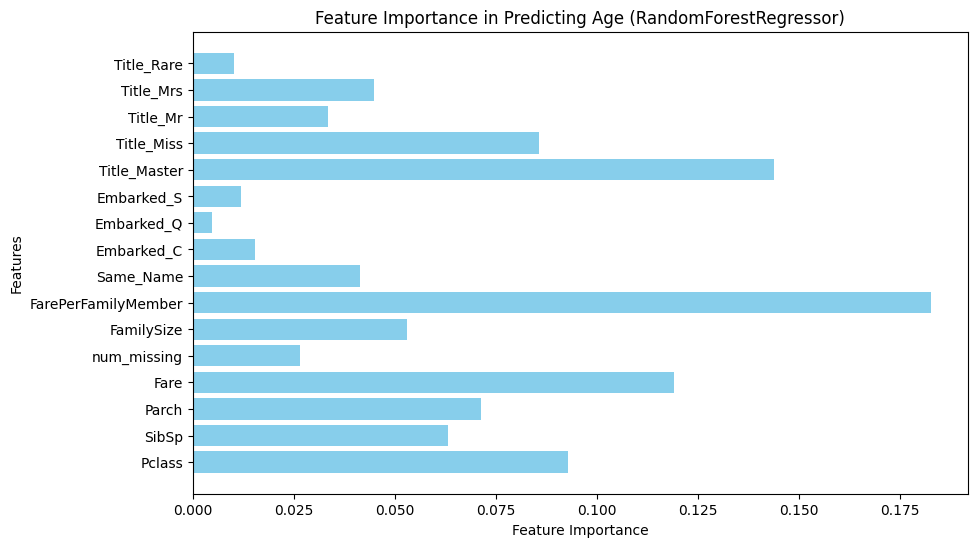

In [194]:
import matplotlib.pyplot as plt
import numpy as np

# 特徴量の重要度を取得
feature_importances = model.feature_importances_

# 特徴量の名前を取得
feature_names = X_train_age.columns

# 可視化
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Age (RandomForestRegressor)")
plt.show()


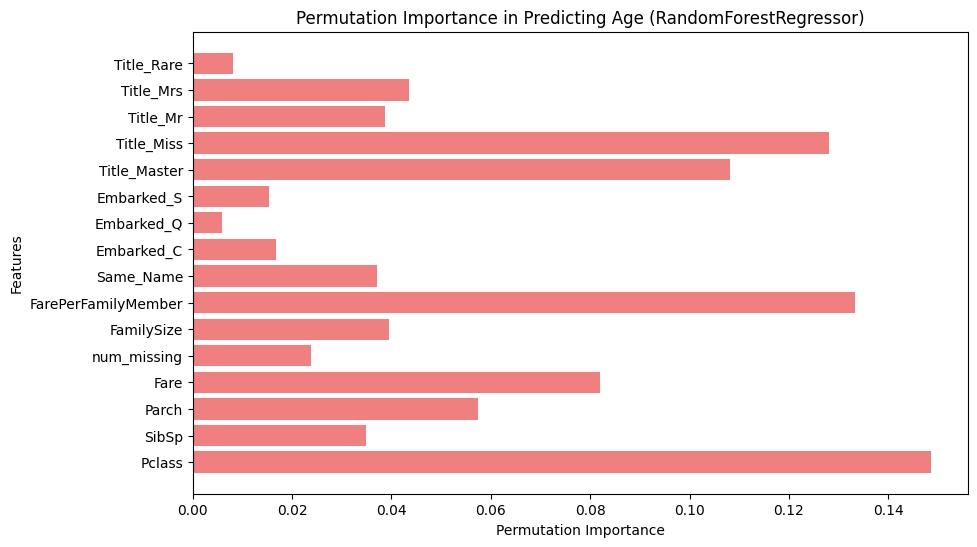

In [195]:
from sklearn.inspection import permutation_importance

# Permutation Importanceの計算（テストデータで評価）
perm_importance = permutation_importance(model, X_train_age, y_train_age, n_repeats=10, random_state=42)

# 可視化
plt.figure(figsize=(10, 6))
plt.barh(feature_names, perm_importance.importances_mean, color='lightcoral')
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Permutation Importance in Predicting Age (RandomForestRegressor)")
plt.show()

In [196]:
train_x

,Pclass,Age,SibSp,Parch,Fare,num_missing,FamilySize,FarePerFamilyMember,Same_Name,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,22.000000,1,0,-0.502445,1,2,-0.454798,2,False,False,True,False,False,True,False,False
1,1,38.000000,1,0,0.786845,0,2,0.438994,1,True,False,False,False,False,False,True,False
2,3,26.000000,0,0,-0.488854,1,1,-0.334757,1,False,False,True,False,True,False,False,False
3,1,35.000000,1,0,0.420730,0,2,0.185187,2,False,False,True,False,False,False,True,False
4,3,35.000000,0,0,-0.486337,1,1,-0.331267,2,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,-0.386671,1,1,-0.193081,1,False,False,True,False,False,False,False,True
887,1,19.000000,0,0,-0.044381,0,1,0.281499,3,False,False,True,False,True,False,False,False
888,3,7.481854,1,2,-0.176263,2,4,-0.392335,2,False,False,True,False,True,False,False,False
889,1,26.000000,0,0,-0.044381,0,1,0.281499,1,True,False,False,False,False,True,False,False


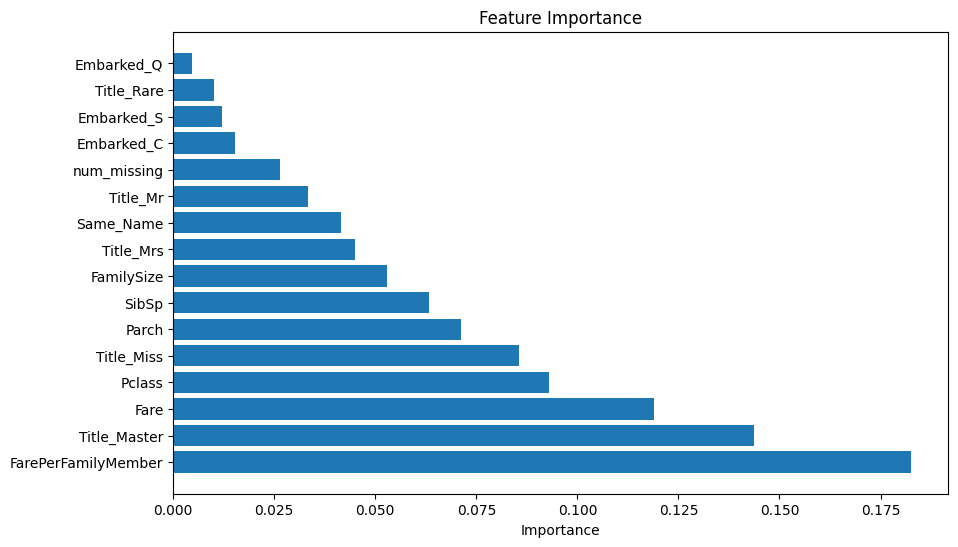

In [197]:
import matplotlib.pyplot as plt
import numpy as np

# ランダムフォレストモデルを再学習（すでに学習済みのものを使う）
model.fit(X_train_age, y_train_age)

# 特徴量の重要度を取得
feature_importances = model.feature_importances_

# 特徴量名を取得（X_train_age のカラム名）
feature_names = X_train_age.columns

# 重要度が高い順に並べる
indices = np.argsort(feature_importances)[::-1]

# 重要度のプロット
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(feature_names)), feature_importances[indices], align="center")
plt.yticks(range(len(feature_names)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.show()


In [198]:
train_x['Predict_Age'] = train_x['Age'].copy()
test_x['Predict_Age'] = test_x['Age'].copy()

In [199]:
#train_x[['Predict_Age']].to_csv('age_data/train_age_data1.csv',index=False)
#test_x[['Predict_Age']].to_csv('age_data/test_age_data1.csv',index=False)